<a href="https://colab.research.google.com/github/singhsukhendra/2015/blob/master/13_Feb_2022_Pneumonia_Detection_with_Quaternion_Residual_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [87]:
! pip install numpy-quaternion

     |████████████████████████████████| 59 kB 6.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for numpy-quaternion: filename=numpy_quaternion-2022.2.10.14.20.39-cp37-cp37m-linux_x86_64.whl size=158264 sha256=a0cb4387a4e953dbf932000c856b2f33b8e83a12c78532ffe74db976176ad5ca
  Stored in directory: /root/.cache/pip/wheels/b3/44/fe/028fa4a206311e9103ec53704f93b9a6e953adca4e3db0270a
Successfully built numpy-quaternion


In [2]:
!pip install keras=="2.2.4"

     |████████████████████████████████| 312 kB 15.4 MB/s 
     |████████████████████████████████| 50 kB 8.8 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.0 requires keras<2.8,>=2.7.0rc0, but you have keras 2.2.4 which is incompatible.


In [3]:
!pip install tensorflow==1.15

     |████████████████████████████████| 412.3 MB 24 kB/s 
     |████████████████████████████████| 503 kB 48.2 MB/s 
     |████████████████████████████████| 3.8 MB 41.3 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=9a4731cd8687c6850b27cd04bc894f970164f460e137b9c03897ddb2900611f4
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: te

In [4]:
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:34<00:00, 86.8MB/s]
100% 2.29G/2.29G [00:34<00:00, 70.7MB/s]


In [6]:

import zipfile
with zipfile.ZipFile("/content/chest-xray-pneumonia.zip","r") as zip_ref:
    zip_ref.extractall("chest-xray-pneumonia")

In [7]:
! mkdir data_used

In [8]:
!mkdir data_used/NORMAL

In [9]:
!mkdir data_used/PNEUMONIA

In [10]:
! cp -r /content/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/*.jpeg   /content/data_used/NORMAL

In [11]:
! cp -r /content/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/*.jpeg   /content/data_used/NORMAL

In [12]:
! cp -r /content/chest-xray-pneumonia/chest_xray/chest_xray/val/NORMAL/*.jpeg   /content/data_used/NORMAL

In [13]:
! cp -r /content/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/*.jpeg   /content/data_used/PNEUMONIA

In [14]:
! cp -r /content/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA/*.jpeg   /content/data_used/PNEUMONIA

In [15]:
! cp -r /content/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/*.jpeg   /content/data_used/PNEUMONIA

In [16]:
import zipfile

with zipfile.ZipFile("complexnn.zip","r") as zip_ref:
    zip_ref.extractall()

In [17]:
import pandas as pd
import numpy as np
import os

from glob import glob
import itertools
import fnmatch
import random
import matplotlib.pylab as plt
#import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
%matplotlib inline

In [18]:
imagePatches = glob('/content/data_used/*/*.jpeg', recursive=True)
for filename in imagePatches[0:1000]:
    print(filename)

/content/data_used/PNEUMONIA/person1481_bacteria_3866.jpeg
/content/data_used/PNEUMONIA/person438_virus_889.jpeg
/content/data_used/PNEUMONIA/person421_virus_866.jpeg
/content/data_used/PNEUMONIA/person21_bacteria_72.jpeg
/content/data_used/PNEUMONIA/person87_bacteria_433.jpeg
/content/data_used/PNEUMONIA/person23_bacteria_95.jpeg
/content/data_used/PNEUMONIA/person467_bacteria_1988.jpeg
/content/data_used/PNEUMONIA/person298_bacteria_1410.jpeg
/content/data_used/PNEUMONIA/person1197_virus_2039.jpeg
/content/data_used/PNEUMONIA/person732_bacteria_2634.jpeg
/content/data_used/PNEUMONIA/person1476_bacteria_3842.jpeg
/content/data_used/PNEUMONIA/person149_virus_299.jpeg
/content/data_used/PNEUMONIA/person255_bacteria_1160.jpeg
/content/data_used/PNEUMONIA/person1649_virus_2850.jpeg
/content/data_used/PNEUMONIA/person911_virus_1567.jpeg
/content/data_used/PNEUMONIA/person1290_virus_2215.jpeg
/content/data_used/PNEUMONIA/person829_bacteria_2740.jpeg
/content/data_used/PNEUMONIA/person351_ba

In [19]:
patternZero = '*IM*.jpeg'
patternOne = '*person*.jpeg'
classZero = fnmatch.filter(imagePatches, patternZero)
classOne = fnmatch.filter(imagePatches, patternOne)
print("IDC(-)\n\n",classZero[0:5],'\n')
print("IDC(+)\n\n",classOne[0:5])

IDC(-)

 ['/content/data_used/NORMAL/NORMAL2-IM-1396-0001.jpeg', '/content/data_used/NORMAL/NORMAL2-IM-1321-0001.jpeg', '/content/data_used/NORMAL/NORMAL2-IM-0569-0001.jpeg', '/content/data_used/NORMAL/NORMAL2-IM-0603-0001.jpeg', '/content/data_used/NORMAL/NORMAL2-IM-0627-0001.jpeg'] 

IDC(+)

 ['/content/data_used/PNEUMONIA/person1481_bacteria_3866.jpeg', '/content/data_used/PNEUMONIA/person438_virus_889.jpeg', '/content/data_used/PNEUMONIA/person421_virus_866.jpeg', '/content/data_used/PNEUMONIA/person21_bacteria_72.jpeg', '/content/data_used/PNEUMONIA/person87_bacteria_433.jpeg']


In [20]:
print(len(classZero))
print(len(classOne))

1583
4273


In [21]:
X=[]
y=[]

for u in classZero:
  X.append(u)
  y.append(0)

for u in classOne:
  X.append(u)
  y.append(1)

In [22]:
df = pd.DataFrame()
df["images"]=X
df["labels"]=y
df=df.sample(frac=1)

In [23]:
def RgbToQuaternion(img):
 b,g,r = cv2.split(img)

 M=np.zeros((50,50,4))
 M[:,:,1]=r
 M[:,:,2]=g
 M[:,:,3]=b
 return(np.array(M))

In [24]:
def batch_generator(df,batch_size,steps):
 idx=1
 while True: 
  yield load_data(df,idx-1,batch_size)## Yields data
  if idx < steps:
    idx+=1
  else:
    idx=1

In [25]:
def load_data(df,idx,batch_size):
 start=idx*batch_size
 end=(idx+1)*batch_size
 x = []
 y = [] 
 for  row  in df.values[start:end,:]:
  img=row[0]

  full_size_image = cv2.imread(img)
  X=cv2.resize(full_size_image, (50,50), interpolation=cv2.INTER_CUBIC)

  image = RgbToQuaternion(X) /255.
  x.append(image) 
  y.append(row[-1] )

 return (np.array(x).reshape(-1,50,50,4), np.array(y).reshape(-1))

In [26]:
df_train, df = train_test_split(df, test_size=0.20)
df_test, df_val = train_test_split(df, test_size=0.5)

In [27]:
from   complexnn                             import *
import keras
from   keras.layers                          import *
from   keras.models                          import Model
import keras.backend                         as     K
import numpy                                 as     np

Using TensorFlow backend.


In [28]:
from keras.optimizers import adam
opt = adam(lr = 0.001,decay=1e-6)

In [29]:
def residual_block(mod_, f_in, f_out, strides_ = (1,1), use_shortcut_ = False):   
    shortcut_ = mod_
    
    k_ = (1,1)
    
    mod_ = QuaternionConv2D(f_in, kernel_size=k_, strides=(1,1), padding = "same")(mod_)
    mod_ = BatchNormalization()(mod_)
    mod_ = ELU()(mod_)
    
    mod_ = QuaternionConv2D(f_in, kernel_size=k_, strides=strides_, padding = "same")(mod_)
    mod_ = BatchNormalization()(mod_)
    mod_ = ELU()(mod_)
    
    mod_ = QuaternionConv2D(f_out, kernel_size=k_, strides=(1,1), padding = "same")(mod_)
    mod_ = BatchNormalization()(mod_)
    mod_ = ELU()(mod_)
    
    if use_shortcut_ == True or strides_ != (1,1):
        shortcut_ = QuaternionConv2D(f_out, kernel_size=k_, strides=strides_, padding = "same")(shortcut_)
        shortcut_ = BatchNormalization()(shortcut_)
        
    mod_ = Add()([shortcut_, mod_])
    mod_ = ReLU()(mod_)
    
    return mod_

In [30]:
def model_build(in_):
    
    k_=(1,1)
    
    mod_ = QuaternionConv2D(16, kernel_size=k_, strides = (1,1), padding = "same")(in_)
    
    mod_ = BatchNormalization()(mod_)
    
    mod_ = ReLU()(mod_)
    
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = residual_block(mod_, 16, 32, use_shortcut_=True)
    
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = residual_block(mod_, 32, 64, use_shortcut_=True)
    
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = residual_block(mod_, 64, 96, use_shortcut_=True)
    
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = residual_block(mod_, 96, 128, use_shortcut_=True)
    
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = GlobalAveragePooling2D()(mod_)
    
    mod_ = Dense(512, activation = "relu")(mod_)
    
    mod_ = Dropout(0.5)(mod_)
    
    mod_ = Dense(1, activation="sigmoid")(mod_)
    
    return mod_

In [31]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [32]:
in_ = Input((50,50,4))
model_ = model_build(in_)













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [33]:
model = Model(input = in_, output = model_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import ReduceLROnPlateau
import cv2
import os

In [35]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='roc', curve='ROC'), # roc curve
      tf.keras.metrics.AUC(name='prc', curve='PR') # precision-recall curve
]

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [36]:
           
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy',precision_m,recall_m,f1_m])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [37]:
history =model.fit_generator(batch_generator(df_train, 128,len(df_train)//128),\
                    steps_per_epoch=len(df_train)//128,epochs=50,\
                    verbose=1,validation_data=batch_generator(df_val, 64,len(df_val)//64),validation_steps=len(df_val)//64)



Epoch 1/50
36/36 [==============================] - 75s 2s/step - loss: 0.5597 - acc: 0.8411 - precision_m: 0.8958 - recall_m: 0.8947 - f1_m: 0.8848 - val_loss: 1.0147 - val_acc: 0.5208 - val_precision_m: 1.0000 - val_recall_m: 0.3626 - val_f1_m: 0.5302
Epoch 2/50
36/36 [==============================] - 65s 2s/step - loss: 0.2492 - acc: 0.9023 - precision_m: 0.9343 - recall_m: 0.9339 - f1_m: 0.9329 - val_loss: 1.0183 - val_acc: 0.5521 - val_precision_m: 0.9882 - val_recall_m: 0.4082 - val_f1_m: 0.5765
Epoch 3/50
36/36 [==============================] - 67s 2s/step - loss: 0.1993 - acc: 0.9234 - precision_m: 0.9459 - recall_m: 0.9503 - f1_m: 0.9472 - val_loss: 0.6777 - val_acc: 0.7135 - val_precision_m: 0.9755 - val_recall_m: 0.6349 - val_f1_m: 0.7678
Epoch 4/50
36/36 [==============================] - 68s 2s/step - loss: 0.1822 - acc: 0.9293 - precision_m: 0.9489 - recall_m: 0.9552 - f1_m: 0.9513 - val_loss: 0.2524 - val_acc: 0.8854 - val_precision_m: 0.9650 - val_recall_m: 0.8792 -

In [38]:
model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 50, 50, 4)    0                                            
__________________________________________________________________________________________________
quaternion_conv2d_1 (Quaternion (None, 50, 50, 64)   128         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 50, 50, 64)   256         quaternion_conv2d_1[0][0]        
__________________________________________________________________________________________________
re_lu_1 (ReLU)                  (None, 50, 50, 64)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
max_poolin

In [ ]:
import numpy as np

In [83]:
 np.save('bcq.npy',history.history)

In [84]:
history.history

{'acc': [0.8411458333333334,
  0.90234375,
  0.9233940972222222,
  0.9292534722222222,
  0.9409722222222222,
  0.9479166666666666,
  0.9552951388888888,
  0.9637586805555556,
  0.9704861111111112,
  0.9737413194444444,
  0.9659288194444444,
  0.9694010416666666,
  0.9702690972222222,
  0.9717881944444444,
  0.9626736111111112,
  0.9756944444444444,
  0.9809027777777778,
  0.982421875,
  0.9819878472222222,
  0.9815538194444444,
  0.9809027777777778,
  0.9835069444444444,
  0.9789496527777778,
  0.9830729166666666,
  0.9871961805555556,
  0.984375,
  0.9822048611111112,
  0.9861111111111112,
  0.9900173611111112,
  0.990234375,
  0.9971788194444444,
  0.9958767361111112,
  0.99609375,
  0.9969618055555556,
  0.998046875,
  0.9969618055555556,
  0.9991319444444444,
  0.9973958333333334,
  0.9967447916666666,
  0.9978298611111112,
  0.9982638888888888,
  0.9984809027777778,
  0.9963107638888888,
  0.9973958333333334,
  0.9954427083333334,
  0.9947916666666666,
  0.9924045138888888,
  0.99

In [39]:
import pandas as pd



# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 

# save to json:  
hist_json_file = 'history.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

# or save to csv: 
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [42]:
def plot_metrics(history):
    
    fig = plt.gcf()
    fig.set_size_inches(20, 3 * 4)

    metrics = ['roc','accuracy','loss', 'prc', 'precision', 'recall']
    for n, metric in enumerate(metrics):
        lims = {'loss': {0,2}}
        name = metric.replace("_"," ").capitalize()
        sp = plt.subplot(2, 3, n + 1)
        plt.plot(history.epoch, history.history[metric], color='C0', label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
                 color='C1', linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric in lims:
            plt.ylim(lims[metric])

        plt.legend()

In [ ]:
print(history.history.keys())

In [88]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:             
     json_file.write(model_json) 

# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

NameError: ignored

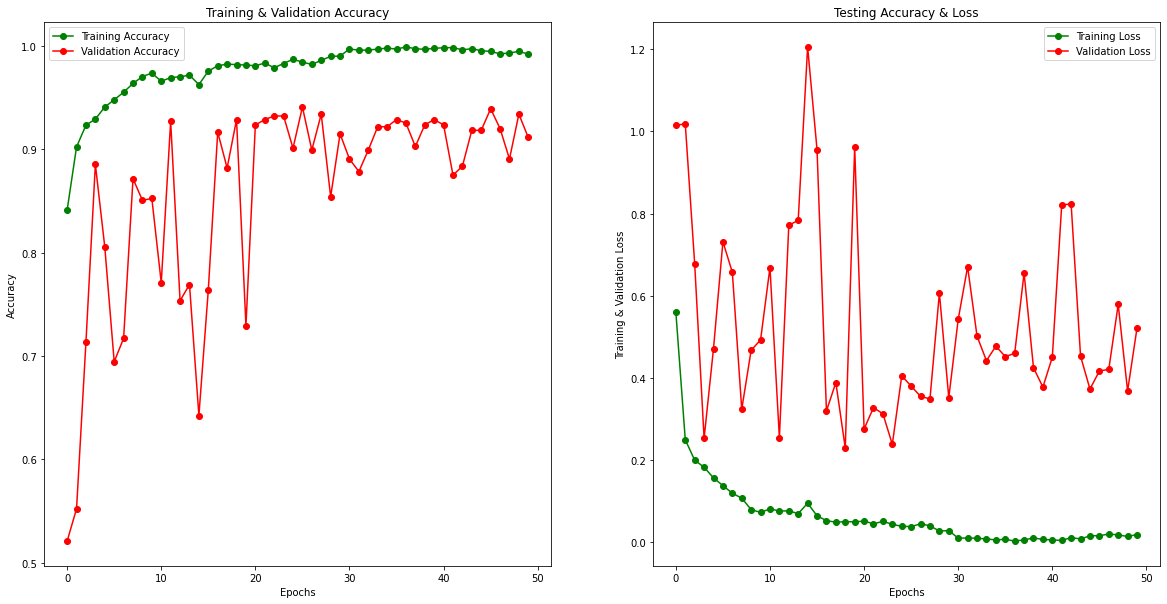

In [47]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['acc']
train_loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

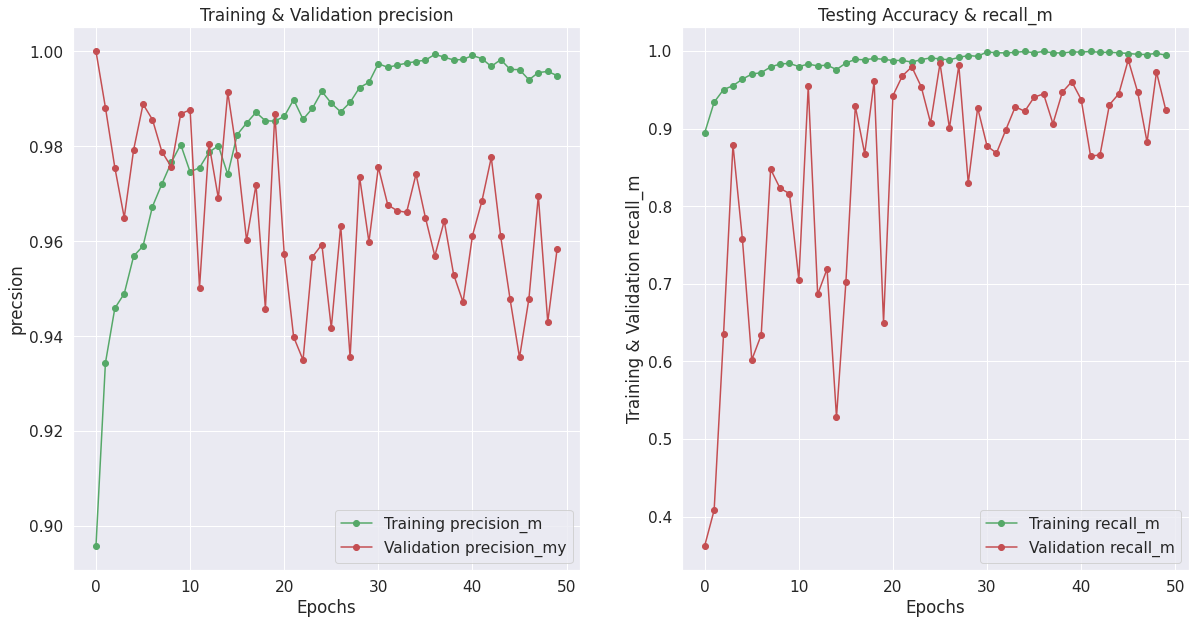

In [95]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_precision_m = history.history['precision_m']
train_recall_m = history.history['recall_m']
val_precision_m = history.history['val_precision_m']
val_recall_m = history.history['val_recall_m']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_precision_m , 'go-' , label = 'Training precision_m')
ax[0].plot(epochs , val_precision_m , 'ro-' , label = 'Validation precision_my')
ax[0].set_title('Training & Validation precision')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("precsion")

ax[1].plot(epochs , train_recall_m , 'g-o' , label = 'Training recall_m')
ax[1].plot(epochs , val_recall_m , 'r-o' , label = 'Validation recall_m')
ax[1].set_title('Testing Accuracy & recall_m')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation recall_m")
plt.show()

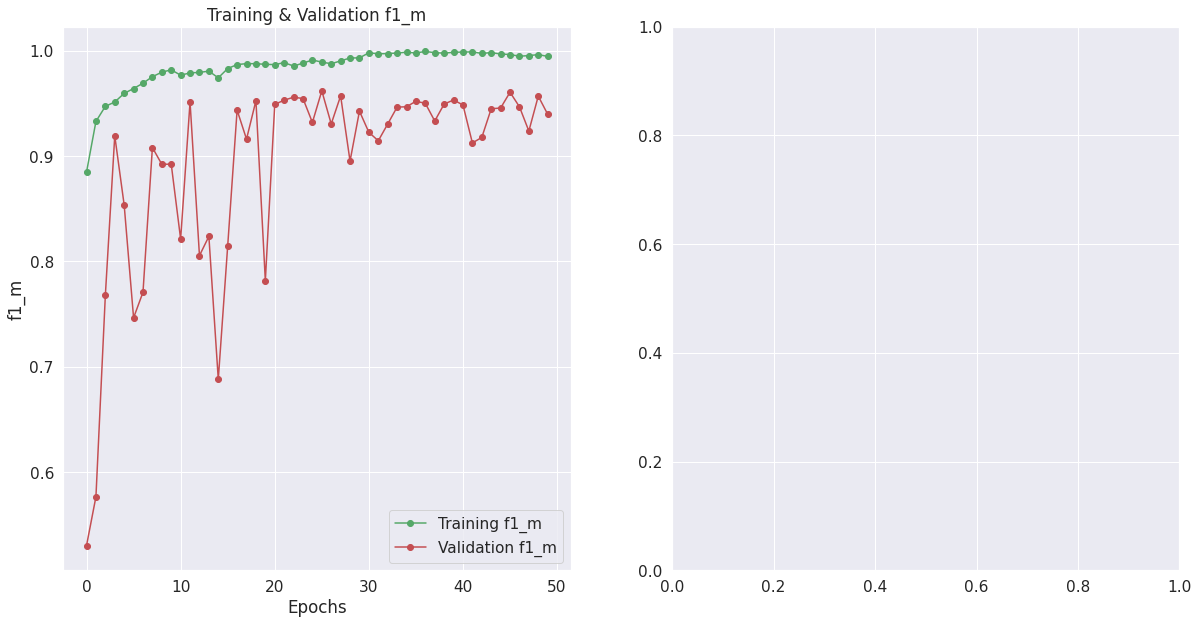

In [96]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_f1_m = history.history['f1_m']

val_f1_m = history.history['val_f1_m']

fig.set_size_inches(20,10)

ax[0].plot(epochs , train_f1_m , 'go-' , label = 'Training f1_m')
ax[0].plot(epochs , val_f1_m , 'ro-' , label = 'Validation f1_m')
ax[0].set_title('Training & Validation f1_m')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("f1_m")


plt.show()

NameError: ignored

dict_keys(['val_loss', 'val_acc', 'val_precision_m', 'val_recall_m', 'val_f1_m', 'loss', 'acc', 'precision_m', 'recall_m', 'f1_m'])


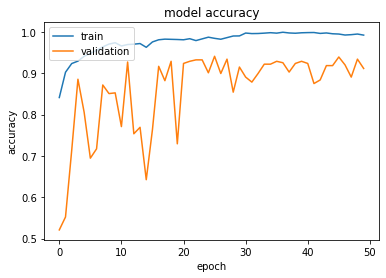

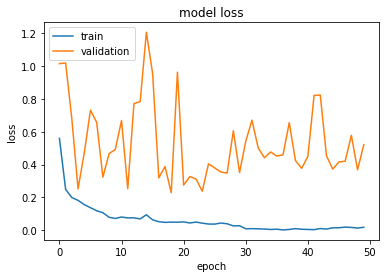

In [48]:
# tensorboard logs 
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [49]:
print('\nhistory dict:', history.history)


history dict: {'val_loss': [1.0146914389398363, 1.0183312230639987, 0.6776588360468546, 0.25236007736788857, 0.4711379243267907, 0.7313491966989305, 0.6568715241220262, 0.3234177711937163, 0.4670221640004052, 0.4921138882637024, 0.6684902707735697, 0.25359879516892964, 0.7711503903071085, 0.783529433939192, 1.2056460711691115, 0.9557212988535563, 0.3193274372153812, 0.3882446636756261, 0.22902514309518868, 0.9621610045433044, 0.27518533832497066, 0.3274102873272366, 0.3122725652323829, 0.23785365372896194, 0.40465989460547763, 0.3798075480412485, 0.354709741142061, 0.3485180655908253, 0.6061263812912835, 0.3515501245856285, 0.5421984824869368, 0.6704658468564352, 0.5014953745736016, 0.4416307070189052, 0.47694307565689087, 0.4516785624954436, 0.4594072600205739, 0.6549569103452895, 0.4243979487154219, 0.3772621990905868, 0.450112071302202, 0.8213365111086104, 0.8228671749432882, 0.4526454508304596, 0.3725665012995402, 0.4162803866590063, 0.42064470301071805, 0.5784720215532515, 0.3681

# Evaluation on testing set 

In [50]:

loss, accuracy, f1_score, precision, recall = model.evaluate_generator(batch_generator(df_test[:256], 256,len(df_test[:256])//256),steps=len(df_test[:256])//256,verbose=1)

1/1 [==============================] - 4s 4s/step


In [51]:
print(model.evaluate_generator(batch_generator(df_test[:256], 256,len(df_test[:256])//256),steps=len(df_test[:256])//256,verbose=1))

1/1 [==============================] - 5s 5s/step
[0.5287721157073975, 0.89453125, 0.9709302186965942, 0.8835979104042053, 0.9252077341079712]


In [52]:
print(model.evaluate_generator(batch_generator(df_train[:256], 256,len(df_train[:256])//256),steps=len(df_train[:256])//256,verbose=1))

1/1 [==============================] - 6s 6s/step
[0.1006704568862915, 0.96875, 1.0, 0.95652174949646, 0.9777777194976807]


In [53]:
print(model.evaluate_generator(batch_generator(df_val[:256], 256,len(df_val[:256])//256),steps=len(df_val[:256])//256,verbose=1))

1/1 [==============================] - 5s 5s/step
[0.48387932777404785, 0.90625, 0.967391312122345, 0.9081632494926453, 0.9368420243263245]


In [54]:
help(model.evaluate_generator)

Help on method evaluate_generator in module keras.engine.training:

evaluate_generator(generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0) method of keras.engine.training.Model instance
    Evaluates the model on a data generator.
    
    The generator should return the same kind of data
    as accepted by `test_on_batch`.
    
    # Arguments
        generator: Generator yielding tuples (inputs, targets)
            or (inputs, targets, sample_weights)
            or an instance of Sequence (keras.utils.Sequence)
            object in order to avoid duplicate data
            when using multiprocessing.
        steps: Total number of steps (batches of samples)
            to yield from `generator` before stopping.
            Optional for `Sequence`: if unspecified, will use
            the `len(generator)` as a number of steps.
        max_queue_size: maximum size for the generator queue
        workers: Integer. Maximum number of processes to 

### **The performance metrics**

In [55]:
from sklearn.metrics import confusion_matrix

y_pred=model.predict_generator(batch_generator(df_test[:256], 256,len(df_test[:256])//256),steps=len(df_test[:256])//256,verbose=1)

y_true=df_test[:256].labels
array=confusion_matrix(y_true, (1.2*y_pred).round(),normalize="true")

1/1 [==============================] - 6s 6s/step


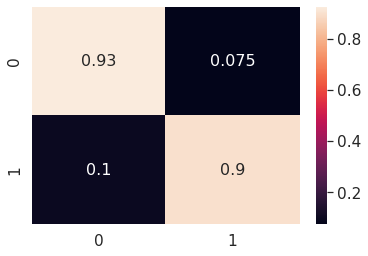

In [56]:
import seaborn as sn

df_cm = pd.DataFrame(array, range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [57]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

In [58]:
accuracy = accuracy_score(y_true, (1.2*y_pred).round())

In [59]:
accuracy

0.90625

In [60]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_true, (1.2*y_pred).round())
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_true, (1.2*y_pred).round())
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_true, (1.2*y_pred).round())
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_true, (1.2*y_pred).round())
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_true, (1.2*y_pred).round())
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_true, (1.2*y_pred).round())
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_true, (1.2*y_pred).round())
print(matrix)

Accuracy: 0.906250
Precision: 0.971429
Recall: 0.899471
F1 score: 0.934066
Cohens kappa: 0.772731
ROC AUC: 0.912422
[[ 62   5]
 [ 19 170]]


In [61]:
from sklearn import metrics

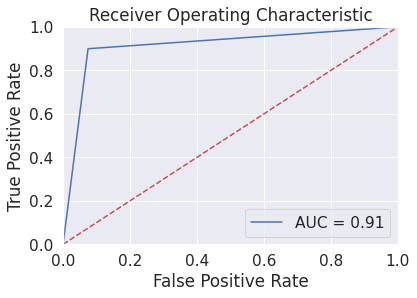

In [62]:
fpr, tpr, threshold = metrics.roc_curve(y_true, (1.2*y_pred).round())
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [63]:
print(metrics.accuracy_score(y_true, (1.2*y_pred).round()))

0.90625


In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning libraries

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve,roc_auc_score

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [65]:
 # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_true, (1.2*y_pred).round())
    total1=sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,Accuracy,Sensitivity,Specificity]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0   0.90625     0.899471     0.925373
0.1          0.1   0.90625     0.899471     0.925373
0.2          0.2   0.90625     0.899471     0.925373
0.3          0.3   0.90625     0.899471     0.925373
0.4          0.4   0.90625     0.899471     0.925373
0.5          0.5   0.90625     0.899471     0.925373
0.6          0.6   0.90625     0.899471     0.925373
0.7          0.7   0.90625     0.899471     0.925373
0.8          0.8   0.90625     0.899471     0.925373
0.9          0.9   0.90625     0.899471     0.925373


In [66]:
print(Accuracy,Sensitivity,Specificity)

0.90625 0.8994708994708994 0.9253731343283582


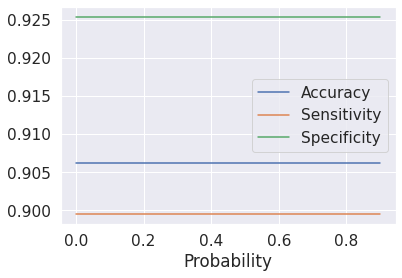

In [67]:
import matplotlib.pyplot as plt
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

In [68]:
# # Let's plot accuracy sensitivity and specificity for various probabilities.


import matplotlib.pyplot as plt


cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

plt.show()
plt.savefig('ss')

<Figure size 432x288 with 0 Axes>

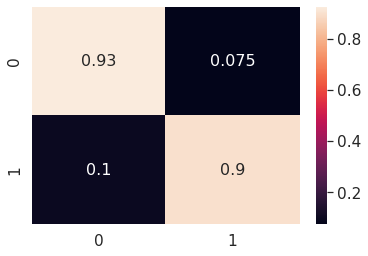

In [69]:
import seaborn as sn

df_cm = pd.DataFrame(array, range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [70]:
df_cm

,0,1
0,0.925373,0.074627
1,0.100529,0.899471


In [71]:
help(model.predict_generator)

Help on method predict_generator in module keras.engine.training:

predict_generator(generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0) method of keras.engine.training.Model instance
    Generates predictions for the input samples from a data generator.
    
    The generator should return the same kind of data as accepted by
    `predict_on_batch`.
    
    # Arguments
        generator: Generator yielding batches of input samples
            or an instance of Sequence (keras.utils.Sequence)
            object in order to avoid duplicate data
            when using multiprocessing.
        steps: Total number of steps (batches of samples)
            to yield from `generator` before stopping.
            Optional for `Sequence`: if unspecified, will use
            the `len(generator)` as a number of steps.
        max_queue_size: Maximum size for the generator queue.
        workers: Integer. Maximum number of processes to spin up
            w

In [72]:
print(accuracy, f1_score, precision, recall)

0.90625 <function f1_score at 0x7fd2f0c5d7a0> 0.9714285714285714 0.8994708994708994


In [73]:
sensitivity=recall

In [74]:
sensitivity

0.8994708994708994

In [75]:
tn, fp, fn, tp =array.ravel()

In [76]:
tn, fp, fn, tp

(0.9253731343283582,
 0.07462686567164178,
 0.10052910052910052,
 0.8994708994708994)

In [77]:
specificity =tn / (tn + fp)

In [78]:
specificity

0.9253731343283582

In [79]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

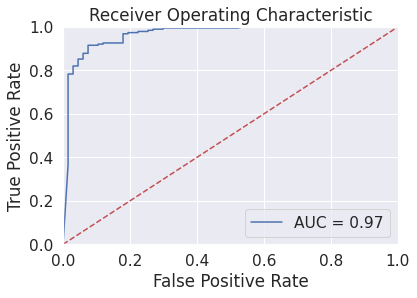

In [80]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_true,y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [81]:
model.save_weights('mymodel_weights')

In [82]:
model.load_weights('/content/mymodel_weights')

AttributeError: ignored